In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
data=pd.read_csv('C:/Data Sets/car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

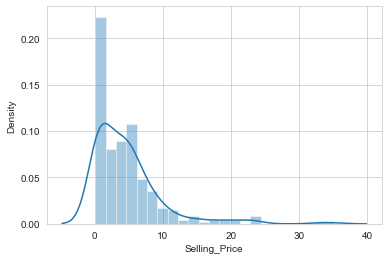

In [14]:
sns.distplot(data['Selling_Price'])

<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

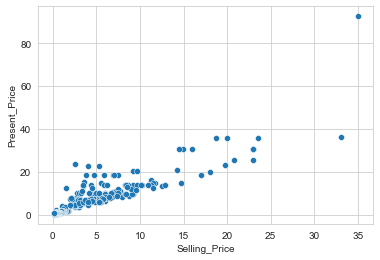

In [97]:
sns.scatterplot(data['Selling_Price'],data[''])

In [15]:
data['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

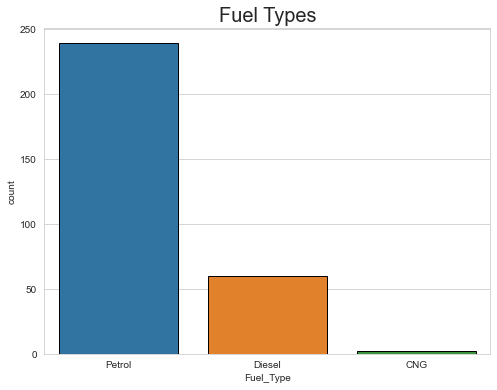

In [18]:
plt.figure(figsize=(8,6))
plt.title('Fuel Types',size=20)
sns.countplot(data['Fuel_Type'],linewidth=1,edgecolor='black')
plt.show()

In [20]:
data['Selling_type'].value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

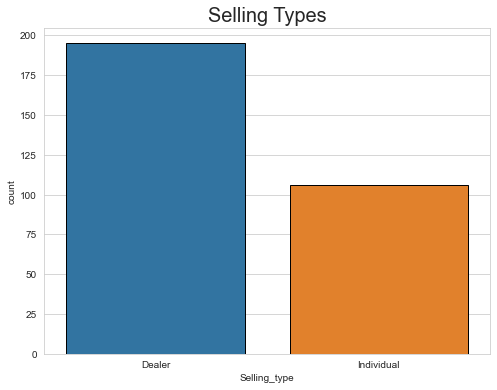

In [22]:
plt.figure(figsize=(8,6))
plt.title('Selling Types',size=20)
sns.countplot(data['Selling_type'],linewidth=1,edgecolor='black')
plt.show()

In [23]:
data['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

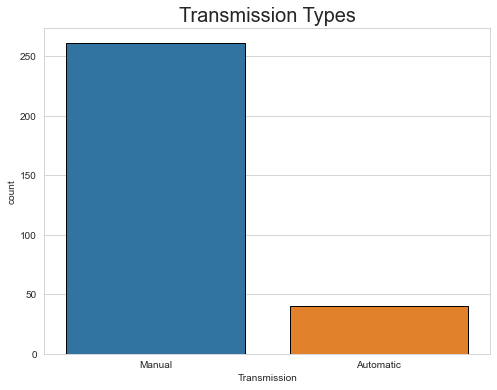

In [24]:
plt.figure(figsize=(8,6))
plt.title('Transmission Types',size=20)
sns.countplot(data['Transmission'],linewidth=1,edgecolor='black')
plt.show()

In [25]:
data['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [32]:
data['fuel_type']=le.fit_transform(data['Fuel_Type'])

In [34]:
data['selling_type']=le.fit_transform(data['Selling_type'])
data['transmission']=le.fit_transform(data['Transmission'])

In [35]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,fuel_type,selling_type,transmission
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1,0,1


In [54]:
X=data.drop(['Car_Name','Selling_Price','Selling_type','Transmission','Fuel_Type'],axis=1)
X

,Year,Present_Price,Driven_kms,Owner,fuel_type,selling_type,transmission
0,2014,5.59,27000,0,2,0,1
1,2013,9.54,43000,0,1,0,1
2,2017,9.85,6900,0,2,0,1
3,2011,4.15,5200,0,2,0,1
4,2014,6.87,42450,0,1,0,1
...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,1,0,1
297,2015,5.90,60000,0,2,0,1
298,2009,11.00,87934,0,2,0,1
299,2017,12.50,9000,0,1,0,1


In [41]:
y=data['Selling_Price']


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [91]:
model=LinearRegression()

In [92]:
model.fit(X_train,y_train)

LinearRegression()

In [93]:
model.score(X_test,y_test)

0.9133788577647125